Defining Functions

In [1]:
def tokenize(sentence):
     tokens_index = {}
     punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
     tokens = []

     for word in sentence.split():
          word = word.lower()
          for i in word:
               if i in punc:
                    word = word.cnplace(i, "")
          if word not in tokens_index:
               tokens_index[word] = len(tokens_index)
          tokens.append(tokens_index[word])

     return tokens_index, tokens

string = 'the cat sat on the keyboard and then the chair, lol~'

tokens_index, tokens = tokenize(string)
# print(tokens_index)
# print(tokens)

In [3]:
import numpy as np

def one_hot_encode(tokens, num_words):
     results = np.zeros((min(len(tokens),num_words), min(num_words,len(tokens))))
     for i, word in enumerate(tokens):
          index = tokens[word]
          try:
               results[i, index] = 1.
          except IndexError:
               break
     return results

results = one_hot_encode(tokens, 15)
# print(results)


def ngrams(tokens, n):
     ngrams = []
     for item_num in range(len(tokens)):
          loc_lst = []
          for times in range(n):
               try:
                    loc_lst.append(tokens[item_num+times])
               except IndexError as e:
                    continue     
          if len(loc_lst) == n:
               ngrams.append(loc_lst)
     return ngrams

ngrams = ngrams(tokens, 7)
# print(ngrams)

Data Preparation

In [4]:
import os
train_path = "/Users/muduo/Documents/GitHub/dsc650/data/external/imdb/aclImdb/train"
test_path = "/Users/muduo/Documents/GitHub/dsc650/data/external/imdb/aclImdb/test"
pos_trains = os.listdir(train_path+"/pos")
neg_trains = os.listdir(train_path+"/neg")
pos_tests = os.listdir(test_path+"/pos")
neg_tests = os.listdir(test_path+"/neg")

pos_train_list = []
for i in pos_trains:
     with open (train_path + "/pos/" + f"{i}") as f:
          text = ""
          for line in f:
               text += line
          pos_train_list.append(text)

pos_test_list = []
for i in pos_tests:
     with open (test_path + "/pos/" + f"{i}") as f:
          text = ""
          for line in f:
               text += line
          pos_test_list.append(text)

neg_train_list = []
for i in neg_trains:
     with open (train_path + "/neg/" + f"{i}") as f:
          text = ""
          for line in f:
               text += line
          neg_train_list.append(text)

neg_test_list = []
for i in neg_tests:
     with open (test_path + "/neg/" + f"{i}") as f:
          text = ""
          for line in f:
               text += line
          neg_test_list.append(text)

train_text_list = pos_train_list.copy()
for i in neg_train_list:
     train_text_list.append(i)

test_text_list = pos_test_list.copy()
for i in neg_test_list:
     test_text_list.append(i)

In [193]:
# Tokenize all text

## Vocab Dict
complete_text = ""
for i in train_text_list:
     complete_text += " " + i

for i in test_text_list:
     complete_text += " " + i

tokens_index, _ = tokenize(complete_text)

## Text to token
def token_lookup(sentence, tokens_index):
     punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
     tokenized = []
     
     for word in sentence.split():
          word = word.lower()
          for i in word:
               if i in punc:
                    word = word.replace(i, "")
          if word in tokens_index:
               tokenized.append(tokens_index[word])
          else:
               print("word not found") 
          
     return tokenized

In [194]:
x_train = []
for sentence in train_text_list:
     x_train.append(token_lookup(sentence, tokens_index))
   
x_test = []
for sentence in test_text_list:
     x_test.append(token_lookup(sentence, tokens_index))

In [196]:
y_train = []
for i in range(12500):
     y_train.append(1)
for i in range(12500):
     y_train.append(0)

y_test = []
for i in range(12500):
     y_test.append(1)
for i in range(12500):
     y_test.append(0)

In [198]:
import random
train_idx = random.sample(range(25000), 25000)
test_idx = random.sample(range(25000), 25000)

x_train_shuffed = []
y_train_shuffed = []
x_test_shuffed = []
y_test_shuffed = []

for i in range(len(x_train)):
     index = train_idx[i]
     x_train_shuffed.append(x_train[index])
     y_train_shuffed.append(y_train[index])

for i in range(len(x_test)):
     index = train_idx[i]
     x_test_shuffed.append(x_test[index])
     y_test_shuffed.append(y_test[index])

In [204]:
from keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train_shuffed, maxlen=2000)
x_test = preprocessing.sequence.pad_sequences(x_test_shuffed, maxlen=2000)
y_train = np.array(y_train_shuffed)
y_test = np.array(y_test_shuffed)

In [205]:
# Input Data prep complete

for i in [x_train, x_test, y_train,y_test]:
     print(len(i))
     print(type(i))

25000
<class 'numpy.ndarray'>
25000
<class 'numpy.ndarray'>
25000
<class 'numpy.ndarray'>
25000
<class 'numpy.ndarray'>


In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(tf.keras.layers.Embedding(input_dim = 200000, output_dim = 32, input_length=200))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(
     optimizer='rmsprop',
     loss='binary_crossentropy',
     metrics=['acc']
     )

history = model.fit(x_train, y_train,
     epochs=10,
     batch_size=32,
     validation_split = 0.2)
     

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_73 (Embedding)     (None, 200, 32)           6400000   
_________________________________________________________________
dense_125 (Dense)            (None, 200, 8)            264       
_________________________________________________________________
dense_126 (Dense)            (None, 200, 1)            9         
Total params: 6,400,273
Trainable params: 6,400,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6927 - acc: 0.5058 - val_loss: 0.6921 - val_acc: 0.4976
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6917 - acc: 0.5120 - val_loss: 0.6918 - val_acc: 0.4978
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6913 - acc: 0.5098 - val_loss:

In [202]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 825us/step - loss: 0.7246 - acc: 0.4987


[0.7246004939079285, 0.49871382117271423]

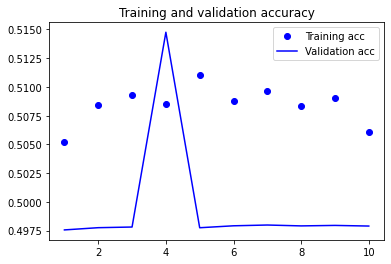

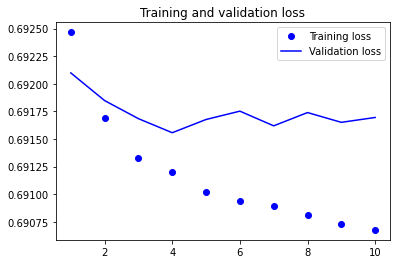

In [224]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [230]:
import tensorflow as tf
re_model = tf.keras.models.Sequential()
re_model.add(tf.keras.layers.Embedding(1000000,100,input_length=200))
re_model.add(tf.keras.layers.LSTM(32))
re_model.add(tf.keras.layers.Flatten())
re_model.add(tf.keras.layers.Dense(32, activation='relu'))
re_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
re_model.summary()
re_model.compile(optimizer='rmsprop',
     loss='binary_crossentropy',
     metrics=['acc'])
re_history = re_model.fit(x_train, y_train,
     epochs=10,
     batch_size=32,
     validation_split=0.2)

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_77 (Embedding)     (None, 200, 100)          100000000 
_________________________________________________________________
lstm_22 (LSTM)               (None, 32)                17024     
_________________________________________________________________
flatten_68 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_133 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 33        
Total params: 100,018,113
Trainable params: 100,018,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 396s 632ms/step - loss: 0.5080 - acc: 0.7362 - val_

In [231]:
re_model.evaluate(x_test, y_test)

782/782 [==============================] - 69s 89ms/step - loss: 0.5386 - acc: 0.8513


[0.5385589599609375, 0.8513200283050537]

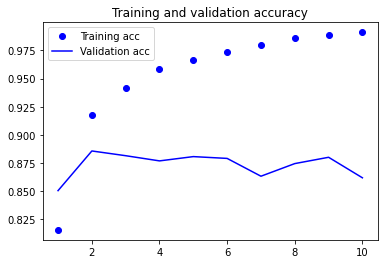

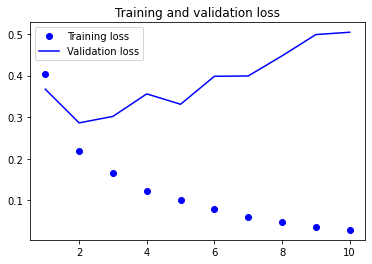

In [232]:
import matplotlib.pyplot as plt
acc = re_history.history['acc']
val_acc = re_history.history['val_acc']
loss = re_history.history['loss']
val_loss = re_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [235]:
import tensorflow as tf
cn_model = tf.keras.models.Sequential()
cn_model.add(tf.keras.layers.Embedding(1000000,100))
cn_model.add(tf.keras.layers.Conv1D(32,3))
cn_model.add(tf.keras.layers.Dense(32, activation='relu'))
cn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
cn_model.summary()
cn_model.compile(optimizer='rmsprop',
     loss='binary_crossentropy',
     metrics=['acc'])
cn_history = cn_model.fit(x_train, y_train,
     epochs=10,
     batch_size=32,
     validation_split=0.2)

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_80 (Embedding)     (None, None, 100)         100000000 
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          9632      
_________________________________________________________________
dense_139 (Dense)            (None, None, 32)          1056      
_________________________________________________________________
dense_140 (Dense)            (None, None, 1)           33        
Total params: 100,010,721
Trainable params: 100,010,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 260s 415ms/step - loss: 0.6920 - acc: 0.5055 - val_loss: 0.6892 - val_acc: 0.5197
Epoch 2/10
625/625 [==============================] - 267s 426ms/step - loss: 0.6884 - acc: 0.5146 - 

In [236]:
cn_model.evaluate(x_test, y_test)

782/782 [==============================] - 12s 16ms/step - loss: 0.6911 - acc: 0.5101


[0.6911347508430481, 0.5100898146629333]

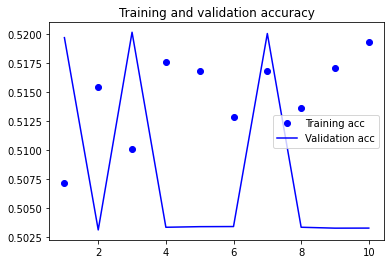

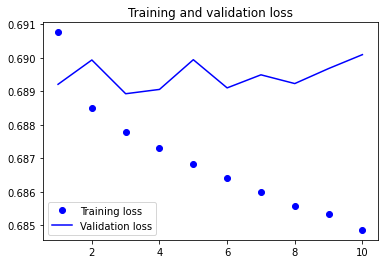

In [237]:
import matplotlib.pyplot as plt
acc = cn_history.history['acc']
val_acc = cn_history.history['val_acc']
loss = cn_history.history['loss']
val_loss = cn_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()